In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


In [80]:
df = pd.read_csv('shop_data.csv', header=1, index_col=[0], parse_dates=[0],)
print('file read in successfully!!')

file read in successfully!!


In [70]:
df.head()

,Sales
DATE,
2018-04-23,4215.0
2018-04-24,2325.0
2018-04-25,2010.0
2018-04-26,1140.0
2018-04-27,2830.0


In [71]:
df.shape

(1043, 1)

In [72]:
df.size

1043

In [73]:
df.tail()

,Sales
DATE,
2021-02-24,2270.0
2021-02-25,1900.0
2021-02-26,2450.0
2021-02-27,NaN
2021-02-28,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1043 entries, 2018-04-23 to 2021-02-28
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   1017 non-null   float64
dtypes: float64(1)
memory usage: 16.3 KB


In [14]:
df.describe()

,Sales
count,1017.000000
mean,2052.753196
std,1092.294432
min,40.000000
25%,1310.000000
50%,1870.000000
75%,2600.000000
max,9890.000000


## Explanation of describe

1. On Average, the shop makes a total sale of 2050 per day
2. Lowest sale was 40 
3. From the mean, it seems the minimum sale was as low as 40 only a few times
4. Highest Sale was 9890 approx 10K. That must have been a great day
5. The standard deviation is not so spread from the mean i.e both mean and std are close which tells us that must sales revolves around the mean 2050.
6. Looking at the Maximum it seems it a one off thing. Might be considered an Outlier just because it an extreme value
7. About 75% of the sales data is less or equal to 2600 which further suggest that must sales revolves around the mean. Looks like the model just have to estimate something around 2K daily sales and it will be good. Just Kidding

## Visuals

1. Histogram

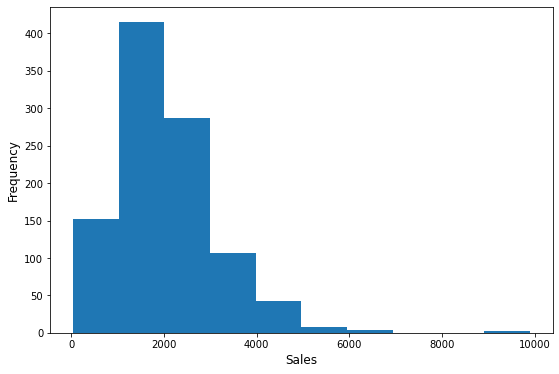

In [15]:
plt.figure(figsize=(9, 6))
plt.hist(df['Sales']);
plt.xlabel('Sales', size=12);plt.ylabel('Frequency', size=12);plt.show()

Long left tail right? I think Dropping that point wont be bad but then let investigate further

In [16]:
def plot_hist(data, bins):
    plt.figure(figsize=(9, 6))
    plt.hist(df['Sales'], bins=bins);
    plt.xlabel('Sales', size=12)
    plt.ylabel('Frequency', size=12)
    plt.show()

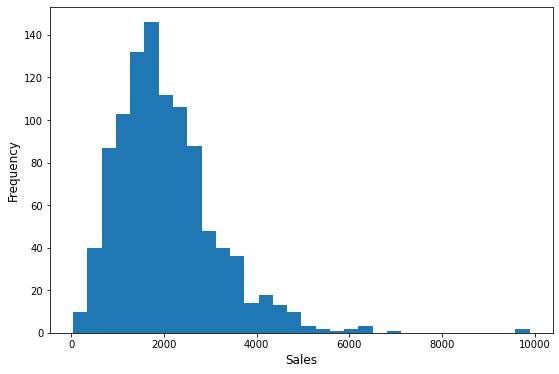

In [18]:
# let visualize using a computed value for bins

# Compute number of data points: n_data
n_data = len(df['Sales'])

# Number of bins is the square root of number of data points: n_bins
n_bins = int(np.sqrt(n_data))

plot_hist(df['Sales'], bins=n_bins)

Now the extreme point is clearly identified, Humm maybe not so much difference compared to the former chart but then the bins are the actual bins for the data

2. ECDF - Emperical Cummulative Density Frequency 

To further Understanding the distribution of the data

In [19]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

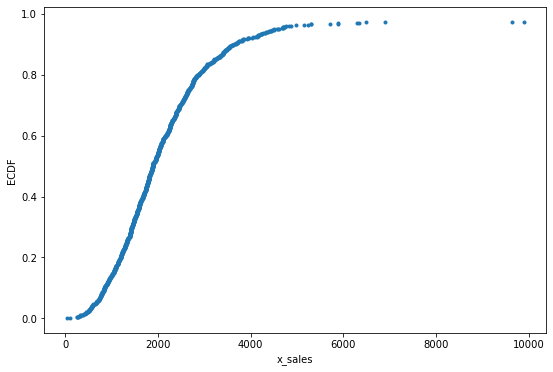

In [21]:
# compute the ECDF of sales
x_sales, y_sales = ecdf(df['Sales'])

# Generate plot
plt.figure(figsize=(9, 6))
plt.plot(x_sales, y_sales, linestyle='none', marker='.');

# Label the axes
plt.ylabel('ECDF')
plt.xlabel('x_sales')

# Display the plot
plt.show()

Looks like there are about 2 points that are clearly off from the other datapoints

In [24]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random(1)

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success

Looking more closely at the 2 extreme sales points, is it possible to simulate the data such that we can come up with a probability to say that we can make those sales in certain number of days?

I am going to attempt this using the Bernoulli Trials method. 

You can think of a Bernoulli trial as a flip of a possibly biased coin. Specifically, each coin flip has a probability  of landing heads (success) and probability  of landing tails (failure). In Our case, success is making a sales greter than 9K while failure is making a sale lower than 9K

How many greater than 9K sales might we expect?

Let's say a we made 100 sales in 100 days. It is possible that anywhere between 0 and 100 of the sales will be greater than 9K. You would like to know the probability of getting a given number of greater than 9k sales, given that the probability of a 9K sale is p = 0.05. To investigate this, you will do a simulation. You will perform 100 Bernoulli trials using the perform_bernoulli_trials() function and record how many greater than 9k sales we get. Here, a success is a sale greater than 9k. (Remember that the word "success" just means that the Bernoulli trial evaluates to True, i.e., did the sales total is greater than 9k) You will do this for another 100 Bernoulli trials. And again and again until we have tried it 1000 times. Then, you will plot a histogram describing the probability of the number of defaults.

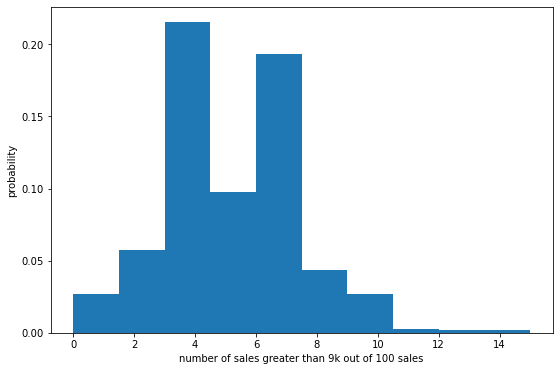

In [28]:
# seed the random generator 
np.random.seed(42)

# initialize the number of sales greater than 9K
n_sales_9k = np.empty(1000)

# compute the number of sales greater than 9k
for i in range(1000):
    n_sales_9k[i] = perform_bernoulli_trials(100, 0.05)
    
# Plot the histogram with default number of bins; label your axes
plt.figure(figsize=(9, 6))
_ = plt.hist(n_sales_9k, density=True)
_ = plt.xlabel('number of sales greater than 9k out of 100 sales')
_ = plt.ylabel('probability')

# Show the plot
plt.show()


Will the store fail?

If discount offered are such that the bank will lose money if 10 or more of its sales are less than 9K, what is the probability that the store will lose money?

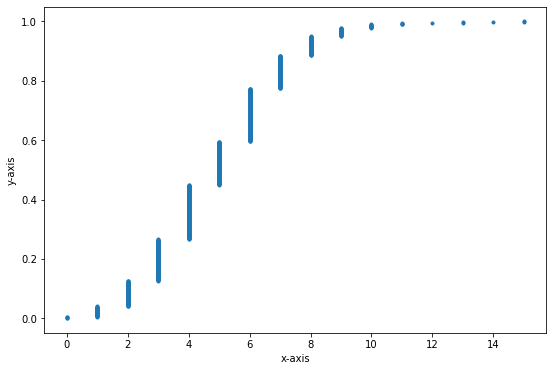

Probability of losing money = 0.022


In [29]:
x, y = ecdf(n_sales_9k)

# Plot the ECDF with labeled axes
plt.figure(figsize=(9, 6))
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('x-axis')
plt.ylabel('y-axis')

# Show the plot
plt.show()

# Compute the number of 100-sales simulations with 10 or more sales greater than 9K: n_lose_money
n_lose_money = np.sum(n_sales_9k >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_sales_9k))

As we might expect, we most likely get 5/100 sales greater than 9K. But we still have about a 2% chance of getting 10 or more sales greater than 9K out of 100 loans. My Mum Store is not doing so bad 2% chance of making more than 9K mehn woof 

Using the Binomial Sampling Distribution

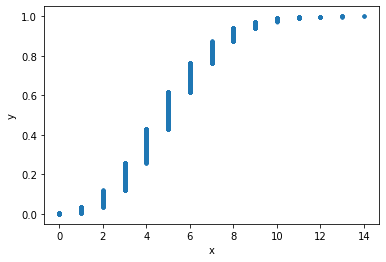

In [30]:
# Take 10,000 samples out of the binomial distribution: n_defaults
n_sales_9k = np.random.binomial(100, 0.05, size=10000)

# Compute CDF: x, y
x, y = ecdf(n_sales_9k)

# Plot the CDF with axis labels
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

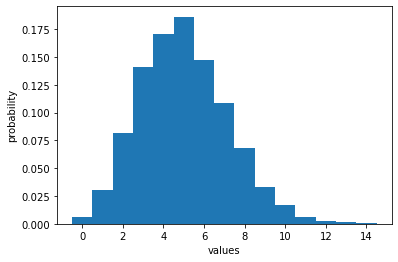

In [31]:
# Compute bin edges: bins
bins = np.arange(0, max(n_sales_9k) + 1.5) - 0.5

# Generate histogram
plt.hist(n_sales_9k, bins=bins, density=True)

# Label axes
plt.xlabel('values')
plt.ylabel('probability')

# Show the plot
plt.show()

We can continue to understand poisson distribution, Exponential Distribution and Posioon Process. But then Let get back to TM Analysis

BTW the chart above is the PMF (Probability Mass Function) making sure the bin edges are 0.5, 1.5, 2.5 etc

3. A line chart

<AxesSubplot:xlabel='DATE'>

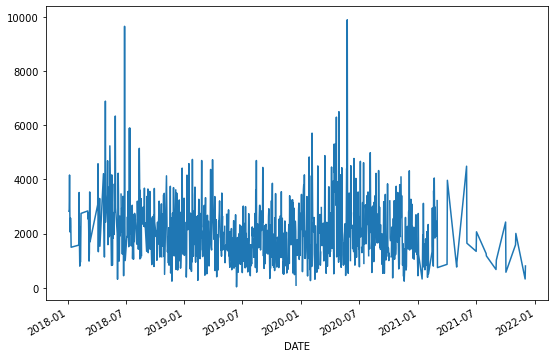

In [33]:
plt.figure(figsize=(9, 6))
df.Sales.plot()

<AxesSubplot:xlabel='DATE'>

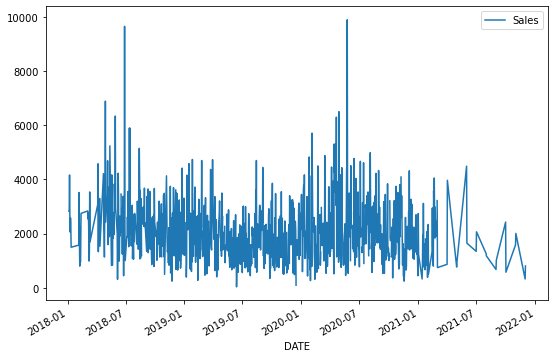

In [35]:
df.plot(figsize=(9, 6))

NOt so much a Stationary Series because of the peak in 2018-07 and 2020-07. Apart from those 2 it looks like a stationary series

To better understand if the data is stationary or not We will apply smoothning

In [38]:
sales_mean = df.rolling(window = 20).mean()

<AxesSubplot:xlabel='DATE'>

<Figure size 432x288 with 0 Axes>

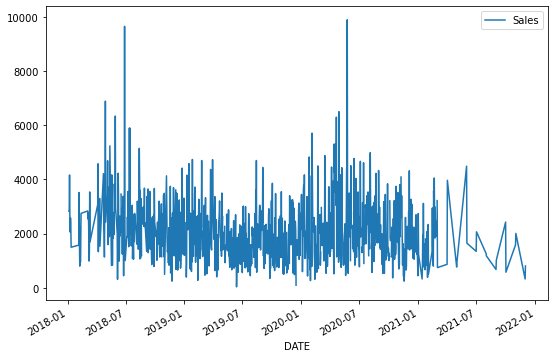

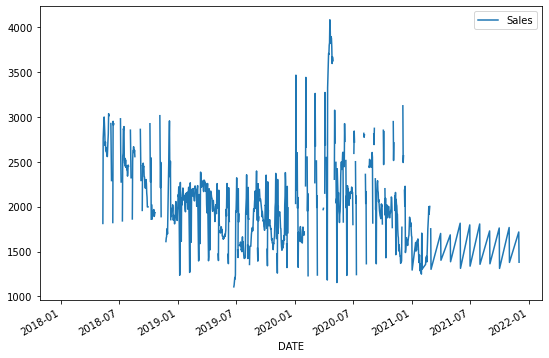

In [39]:
plt.figure()
df.plot(figsize=(9, 6))
sales_mean.plot(figsize=(9, 6))

So the spike clearly exist around 2020-07

## Building a Baseline Model

In [125]:
df = df[df['Sales'] <= 7000]
df = df[:-2]
df_no_na = df.fillna(method='ffill')

In [126]:
sales_df = pd.DataFrame(data=zip(df_no_na['Sales'], df_no_na['Sales'].shift(1)), columns=['Actual_Sales', 'Shifted_Sales'])

sales_df.head()

,Actual_Sales,Shifted_Sales
0,4215.0,NaN
1,2325.0,4215.0
2,2010.0,2325.0
3,1140.0,2010.0
4,2830.0,1140.0


In [127]:
sales_df = sales_df[1:]

In [128]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(sales_df['Actual_Sales'], sales_df['Shifted_Sales'])
print("MSE:", error)

MSE: 1683518.5029644268


In [129]:
np.sqrt(error)

1297.5047217503397

From the error score 1297 and a std deviation of 1092, any other complex model that will be built must be lower than this value else the model isn't worth the effort.

## Building Advanced TS Model (ARIMA)

Arima stands for AutoRegressive(p) Integrated(d) Moving Average(q)

In [88]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

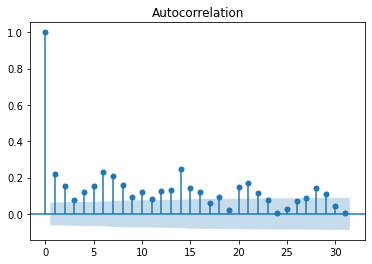

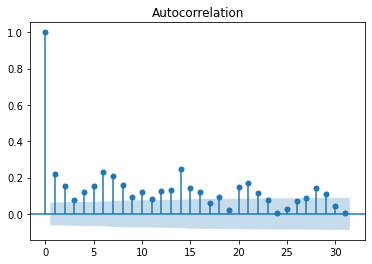

In [130]:
# plot acf to identify parameter q
# ARIMA(p,d,q)

plot_acf(df)

q = 3, 10,12, 18, 20

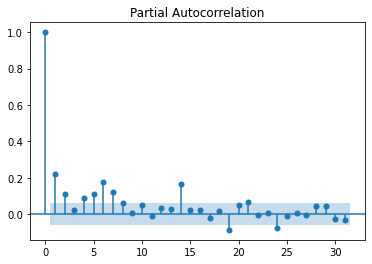

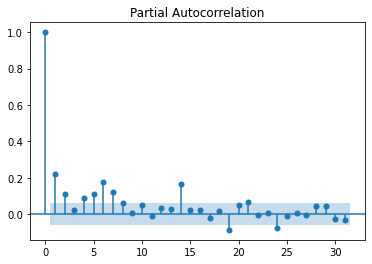

In [90]:
# plot_pacf to identify the value of p
plot_pacf(df)

p = 3, 8,9

In [131]:
df_train = df_no_na[:800]
df_test = df_no_na[800:]

print(df_train.size, df_test.size)

800 213


In [93]:
# p = 1, d=0, q = 1

from statsmodels.tsa.arima_model import ARIMA


In [132]:
arima_model = ARIMA(df_train, order=(1, 0, 1))
arima_model_fit = arima_model.fit()
arima_model_fit.aic

13337.525631490149

In [133]:
# forecast
sales_forecast = arima_model_fit.forecast(steps=len(df_test))[0]

In [134]:
np.sqrt(mean_squared_error(df_test, sales_forecast))

958.5717941008364

Better than the baseline as well as the standard error

In [135]:
sales_forecast_series = pd.Series(sales_forecast, index=df_test.index)

<AxesSubplot:xlabel='DATE'>

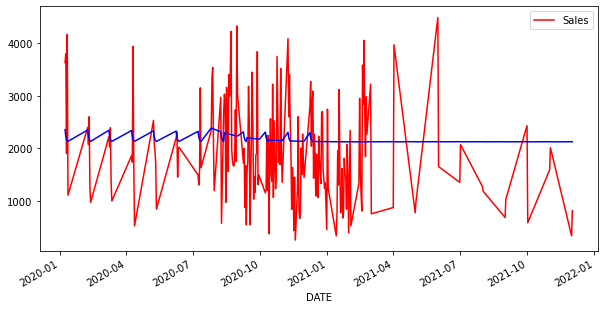

In [136]:
df_test.plot(figsize=(10, 5), color='red')
sales_forecast_series.plot(figsize=(10,5), color='blue')

From the chart, it looks like the model is underfitting calling for a more complex model to understand some patterns in the data. Up Next Complex Model